In [2]:
%pylab notebook
import os, sys, importlib
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import pandas as pd, numpy as np, scipy as scp , seaborn as sns
import hts_fitting as hts, default_figure_style as dfs, hts_dosecalculations as dose, hts_fitfunctions as ff, hts_misc as misc

for lib in [hts, ff, dfs, misc]:
    importlib.reload(lib)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Get data for the suspicious row

In [15]:
i = 161 #489, [680, 681, 682],

cols = [0, 3, 4, 5, 6, 7, 15, 16, 17, 18]

names = [
    'tapeid',     # tape sample name
    'sname',      # sheet name in spreadsheet with beam current data
    't0Beam',     # start time of interval for beam current evaluation
    't1Beam',     # stop time of interval for beam current evaluation
    't0Offset',   # start time of interval for beam current offset evaluation
    't1Offset',    # stop time of interval for beam current offset evaluation
    'f0',
    'foff',
    'fon',
    'feq'    
]
dfrow = pd.read_excel(dfs.master, usecols=cols, names=names, skiprows=1).iloc[i-3]

## Check the IVs

<IPython.core.display.Javascript object>


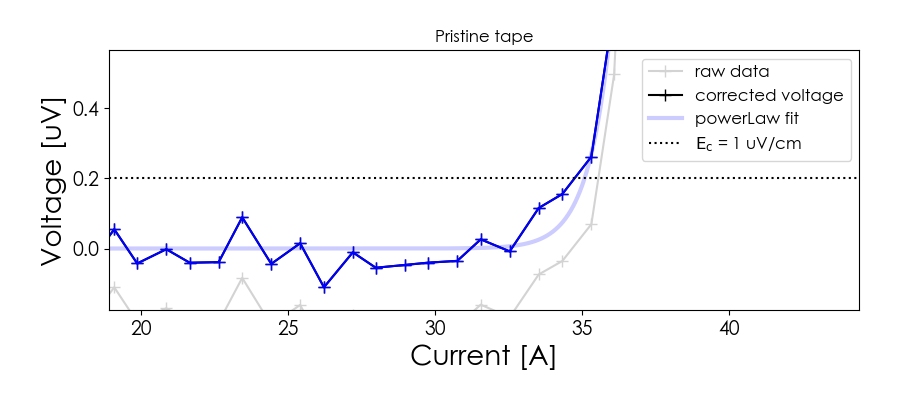

IntText(value=1, description='IV#:')

40.0 38.0


In [17]:
path = '../data/Ic/{0}/'.format(dfrow.tapeid)
fpaths = [path+f for f in [dfrow.f0, dfrow.fon, dfrow.foff, dfrow.feq]]
hts.showcaseIVs(fpaths, style='powerLaw', titles=['Pristine tape', 'Beam On', 'Beam Off', 'Beam On Equivalent'])

## Check the beam current intervals

<IPython.core.display.Javascript object>


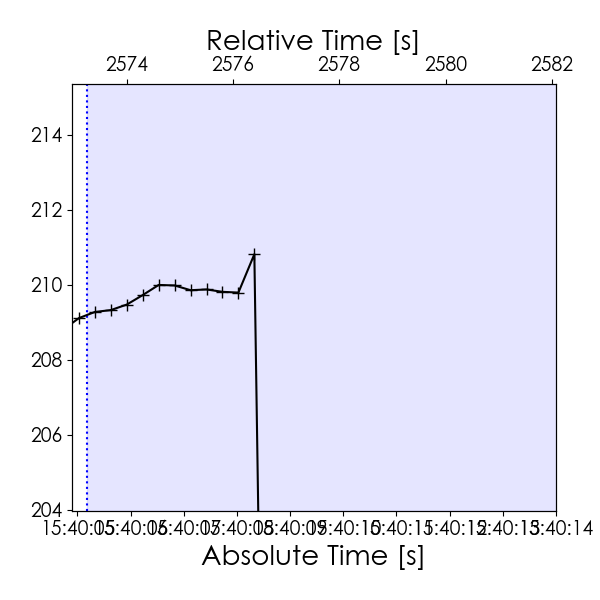

2024-03-15 14:57:13 2024-03-15 17:38:14


-3.1399999999999997

In [58]:
ibpath = '../data/flux/{0}.xlsx'.format(dfrow.tapeid)
sname = '{}'.format(dfrow.sname)

_, _, _, data = dose.plotBeamCurrentWithMeasurements([fpaths[1]], ibpath, sname)
cut = (1996 <= data.time_s)&(data.time_s <= 1998)
data.ibeam_nA[cut].mean()